In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
from scipy.optimize import minimize

def neg_log_lik(theta, x, y, N):
    # enforce theta > 0
    if theta <= 0:
        return np.inf
    
    p = 1 - np.exp(-theta * x)
    # numerical stability
    p = np.clip(p, 1e-12, 1-1e-12)
    
    ll = y * np.log(p) + (N - y) * np.log(1 - p)
    return -np.sum(ll)

MLE theta = 0.0005794410329579676
MLE theta = 4.104135148632789e-06
MLE theta = 0.0003397591050151577
MLE theta = 4.141937893849094e-07


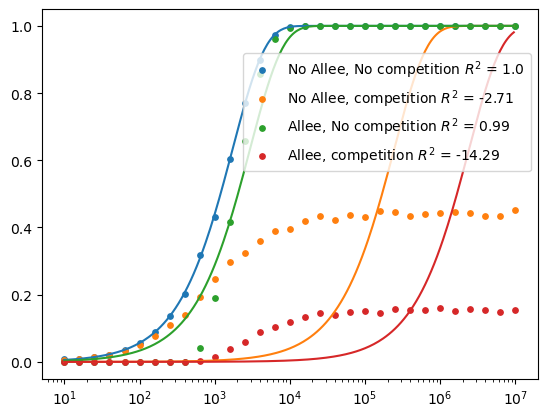

In [158]:
def model(x, c):
    return 1 - np.exp(-c * x)

df = pd.read_excel("PR_PopulationSize.xlsx", sheet_name="Density_Dependence")
df_values = df[df.columns[3:]]

for i in range(df_values.shape[0]):
    if df['Mate-finding'][i] == 'AM' : 
        lbl = 'No Allee'
    else : 
        lbl = 'Allee'
    if df['Competition'][i] == 1: 
        lbl += ', competition'
    else :
        lbl += ', No competition'
    
    Ndata_range = np.array(df_values.columns, dtype=float )
    PRdata_range = np.array(1-df_values.iloc[i], dtype=float)
    
    x = np.array(Ndata_range)
    N = np.array([10**4 for xi in x])
    y = np.array([PR*10**4 for PR in PRdata_range])

    # starting value
    theta0 = 0.001

    res = minimize(
        lambda t: neg_log_lik(t, x, y, N),
        x0=[theta0],
        bounds=[(1e-9, None)]
    )

    theta = res.x[0]
    print("MLE theta =", theta)
    
    N_range = [ 10**x for x in np.arange(1,7,0.02) ] 
    PR_range = [model(N, theta) for N in N_range]
    
    PRpred_range = np.array([model(N, theta) for N in Ndata_range])
    
    ss_res = np.sum((PRdata_range - PRpred_range)**2)
    ss_tot = np.sum((PRdata_range - np.mean(PRdata_range))**2)
    r2 = 1 - ss_res/ss_tot
    lbl += ' $R^2$ = ' + str(round(r2,2))
    
    plt.scatter(df_values.columns, 1-df_values.iloc[i], label = lbl, s=15)
    plt.plot( N_range , PR_range )
    
plt.xscale('log')
#plt.yscale('log')

plt.legend(loc = 'upper right', bbox_to_anchor = (1,0.9) )



MLE theta = 0.0005794410329579676
MLE theta = 4.104135148632789e-06
MLE theta = 0.0003397591050151577
MLE theta = 4.141937893849094e-07
MLE theta = 0.0005794347807086359
MLE theta = 0.00012308909922638587
MLE theta = 0.0003369738415869032
MLE theta = 1.645595077554473e-05
MLE theta = 0.0005837723864056279
MLE theta = 7.171523956060396e-06
MLE theta = 0.00034086320714712053
MLE theta = 1.3448610614553953e-06
MLE theta = 0.0005178800527748812
MLE theta = 4.106697153663202e-06
MLE theta = 0.0003343196936910565
MLE theta = 4.074393249688333e-07
MLE theta = 0.00051755394214595
MLE theta = 0.00012634825533776838
MLE theta = 0.0003312636251487064
MLE theta = 1.5898454428004093e-05
MLE theta = 0.0005244088150447487
MLE theta = 7.031165995895272e-06
MLE theta = 0.000337396133260739
MLE theta = 1.3469461251722356e-06


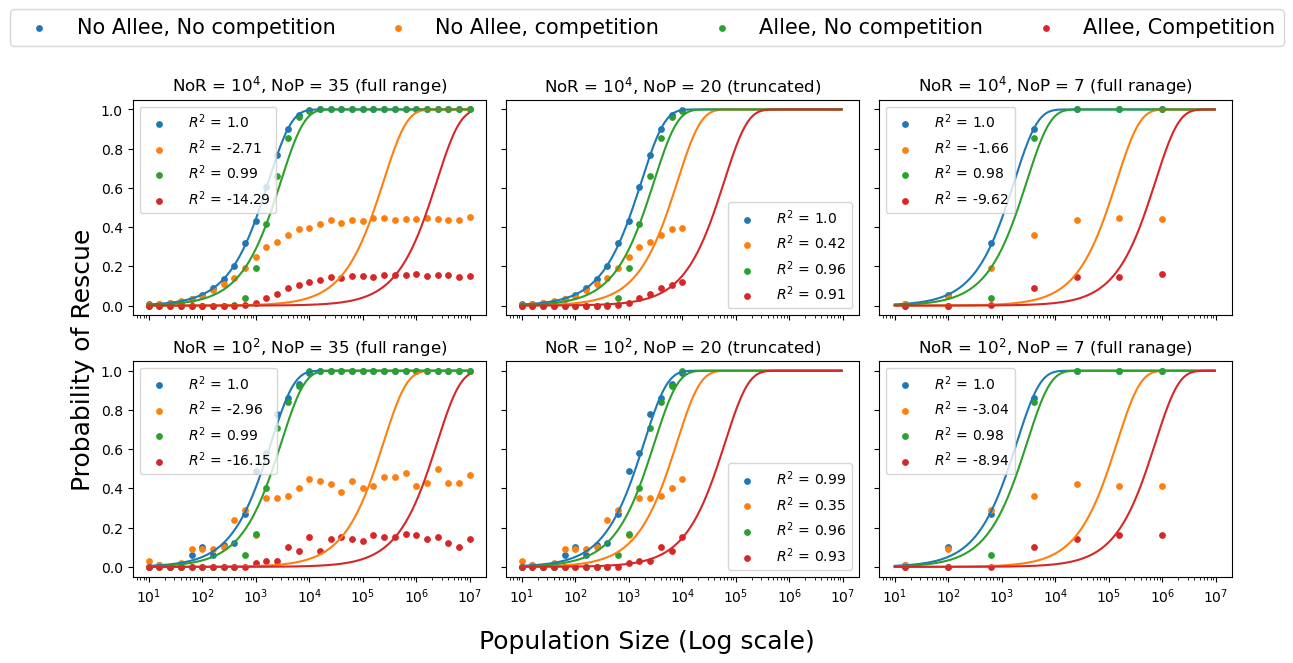

In [53]:
def model(x, c):
    return 1 - np.exp(-c * x)

def MLE_fit(Ndata_range, PRdata_range): 
    x = np.array(Ndata_range)
    N = np.array([10**4 for xi in x])
    y = np.array([PR*10**4 for PR in PRdata_range])

    # starting value
    theta0 = 0.001

    res = minimize(
        lambda t: neg_log_lik(t, x, y, N),
        x0=[theta0],
        bounds=[(1e-9, None)]
    )

    theta = res.x[0]
    
    PRpred_range = np.array([model(N, theta) for N in Ndata_range])
    
    ss_res = np.sum((PRdata_range - PRpred_range)**2)
    ss_tot = np.sum((PRdata_range - np.mean(PRdata_range))**2)
    r2 = 1 - ss_res/ss_tot
    
    
    return theta, r2
   
dfhigh = pd.read_excel("PR_PopulationSize.xlsx", sheet_name="Density_Dependence")
dflow = pd.read_excel("PR_PopulationSize_LowRep.xlsx", sheet_name="Density_Dependence")


fig, ax = plt.subplots(2,3, figsize = (12,6), sharex=True, sharey=True)

for df_ind, df in enumerate([dfhigh,dflow]): 
    for sampling_scheme in range(3) :
        if sampling_scheme == 0 : 
            df_values = df[df.columns[3:]]
        elif sampling_scheme == 1 : 
            df_values = df[df.columns[3:-15]]
        else :
            df_values = df[df.columns[np.array(range(4,len(df.columns)-2,4))]]
        axcur = ax[df_ind][sampling_scheme]
        
        for i in range(df_values.shape[0]):
            if df['Mate-finding'][i] == 'AM' : 
                lbl = 'No Allee'
            else : 
                lbl = 'Allee'
            if df['Competition'][i] == 1: 
                lbl += ', competition'
            else :
                lbl += ', No competition'

            Ndata_range = np.array(df_values.columns, dtype=float )
            PRdata_range = np.array(1-df_values.iloc[i], dtype=float)

            theta, r2 = MLE_fit(Ndata_range, PRdata_range)
            print("MLE theta =", theta)

            N_range = [ 10**x for x in np.arange(1,7,0.02) ] 
            PR_range = [model(N, theta) for N in N_range]

            lbl = ' $R^2$ = ' + str(round(r2,2))

            axcur.scatter(df_values.columns, 1-df_values.iloc[i], label = lbl, s=15)
            axcur.plot( N_range , PR_range )

        axcur.set_xscale('log')
        axcur.legend()
        

handles, _ = ax[0][0].get_legend_handles_labels()

new_labels = ["No Allee, No competition", "No Allee, competition", "Allee, No competition", "Allee, Competition"]
fig.supxlabel('Population Size (Log scale)', fontsize = 18)
fig.supylabel('Probability of Rescue', fontsize = 18)


ax[0][0].set_title('NoR = $10^4$, NoP = 35 (full range)')
ax[0][1].set_title('NoR = $10^4$, NoP = 20 (truncated)')
ax[0][2].set_title('NoR = $10^4$, NoP = 7 (full ranage)')

ax[1][0].set_title('NoR = $10^2$, NoP = 35 (full range)')
ax[1][1].set_title('NoR = $10^2$, NoP = 20 (truncated)')
ax[1][2].set_title('NoR = $10^2$, NoP = 7 (full ranage)')

plt.tight_layout()

fig.legend(handles,
           new_labels,
           loc="upper center",
           ncol=len(new_labels),
           frameon=True,
          fontsize=15,
          bbox_to_anchor=(0.5, 1.1))

plt.savefig("PR_denisty.png", format='png', bbox_inches="tight")
#plt.legend(loc = 'upper right', bbox_to_anchor = (1,0.9) )

In [14]:
df[df.columns[np.array(range(1,10,2))]]

,Mate-finding,10,25.1188643150958,63.0957344480193,158.4893192461113
0,AM,0.9929,0.9853,0.9643,0.9121
1,AM,0.9953,0.9845,0.9667,0.9223
2,0.01,1.0000,1.0000,1.0000,1.0000
3,0.01,1.0000,1.0000,1.0000,1.0000


MLE theta = 0.0005178800527748812
MLE theta = 4.106697153663202e-06
MLE theta = 0.0003343196936910565
MLE theta = 4.074393249688333e-07


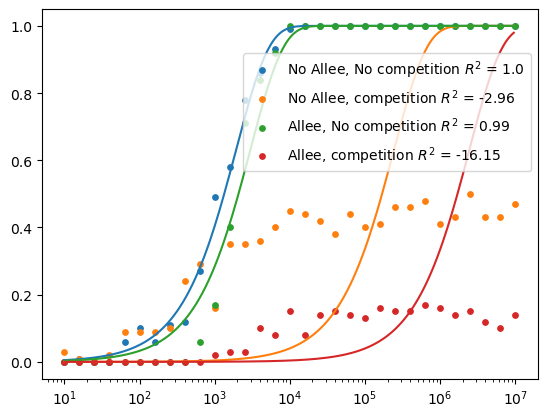

In [155]:
def model(x, c):
    return 1 - np.exp(-c * x)

df = pd.read_excel("PR_PopulationSize_LowRep.xlsx", sheet_name="Density_Dependence")
df = df[df.columns[:]]
df_values = df[df.columns[3:]]

for i in range(df_values.shape[0]):
    if df['Mate-finding'][i] == 'AM' : 
        lbl = 'No Allee'
    else : 
        lbl = 'Allee'
    if df['Competition'][i] == 1: 
        lbl += ', competition'
    else :
        lbl += ', No competition'
    
    Ndata_range = np.array(df_values.columns, dtype=float )
    PRdata_range = np.array(1-df_values.iloc[i], dtype=float)
    
    x = np.array(Ndata_range)
    N = np.array([10**4 for xi in x])
    y = np.array([PR*10**4 for PR in PRdata_range])

    # starting value
    theta0 = 0.001

    res = minimize(
        lambda t: neg_log_lik(t, x, y, N),
        x0=[theta0],
        bounds=[(1e-9, None)]
    )

    theta = res.x[0]
    print("MLE theta =", theta)
    
    N_range = [ 10**x for x in np.arange(1,7,0.02) ] 
    PR_range = [model(N, theta) for N in N_range]
    
    PRpred_range = np.array([model(N, theta) for N in Ndata_range])
    
    ss_res = np.sum((PRdata_range - PRpred_range)**2)
    ss_tot = np.sum((PRdata_range - np.mean(PRdata_range))**2)
    r2 = 1 - ss_res/ss_tot
    lbl += ' $R^2$ = ' + str(round(r2,2))
    
    plt.scatter(df_values.columns, 1-df_values.iloc[i], label = lbl, s=15)
    plt.plot( N_range , PR_range )
    
plt.xscale('log')

plt.legend(loc = 'upper right', bbox_to_anchor = (1,0.9) )